In [1]:
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sys
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

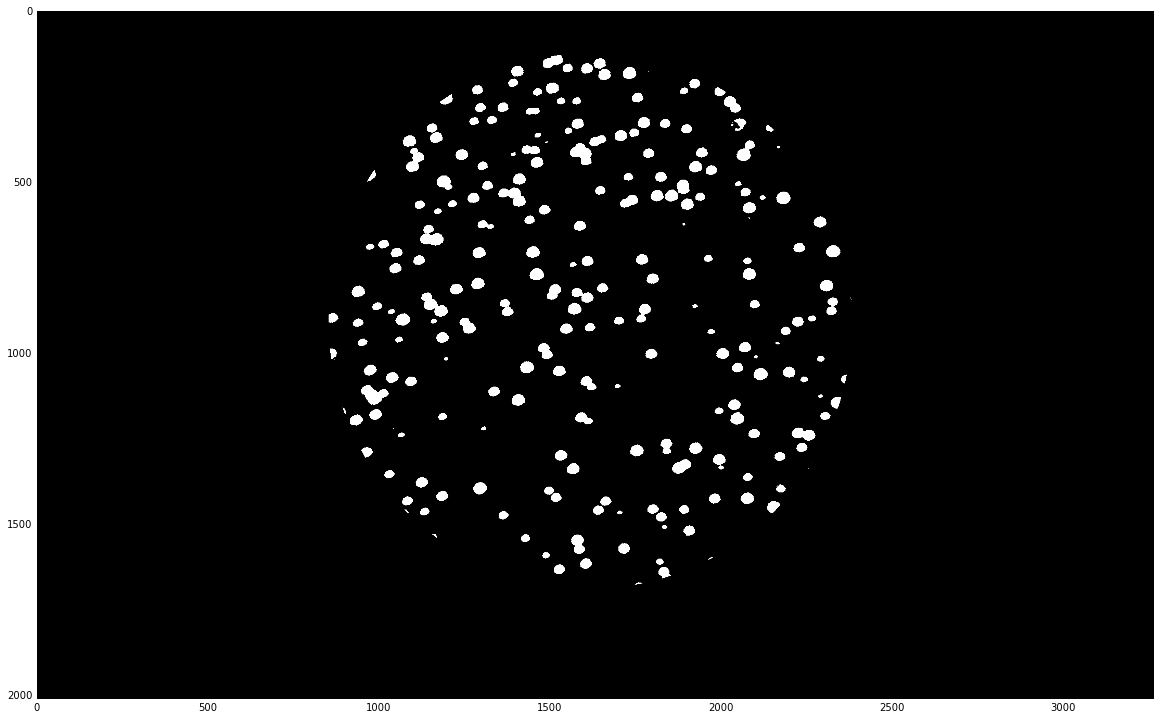

In [2]:
img = cv2.imread('images/set1/D_290.tif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 0, 255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

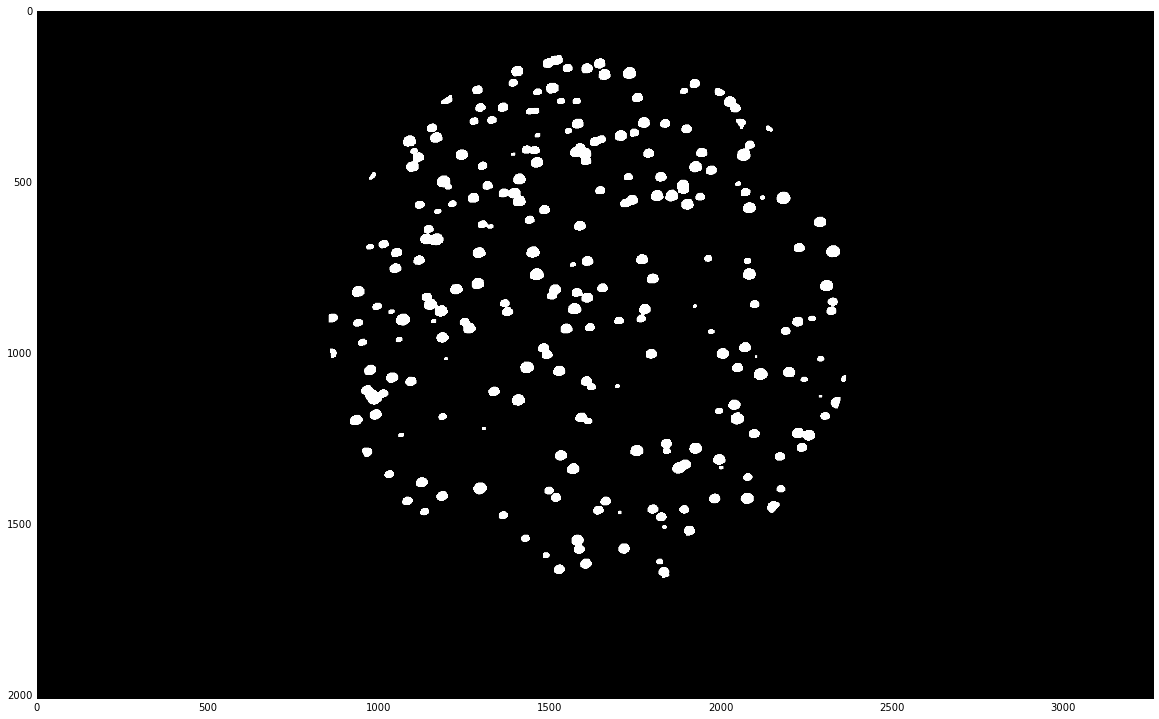

In [3]:
kernel = np.ones((3,3), np.uint8)
opening = thresh
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=3)
plt.imshow(opening, cmap='gray')

In [4]:
sure_bg = cv2.dilate(opening,kernel,iterations=6)
#plt.imshow(sure_bg, cmap='gray')

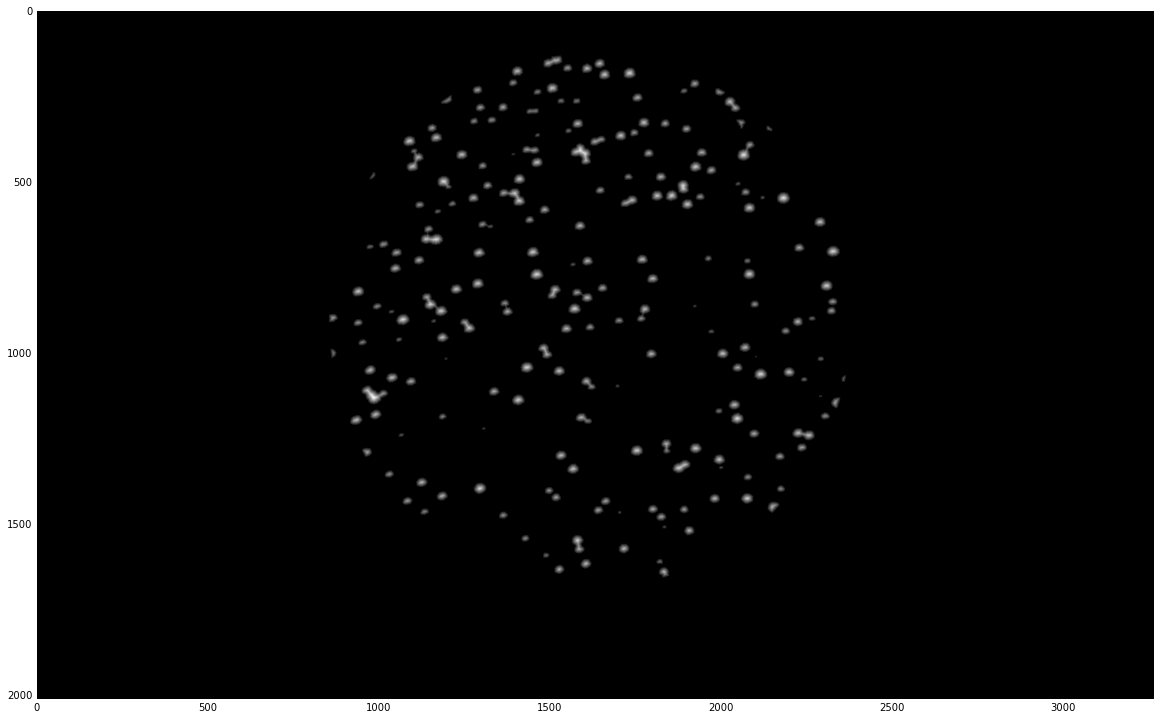

In [5]:
dt = cv2.distanceTransform(opening,cv2.DIST_L2,3)
dt = ((dt - dt.min()) / (dt.max() - dt.min()) * 255).astype(np.uint8)
plt.imshow(dt, cmap='gray')

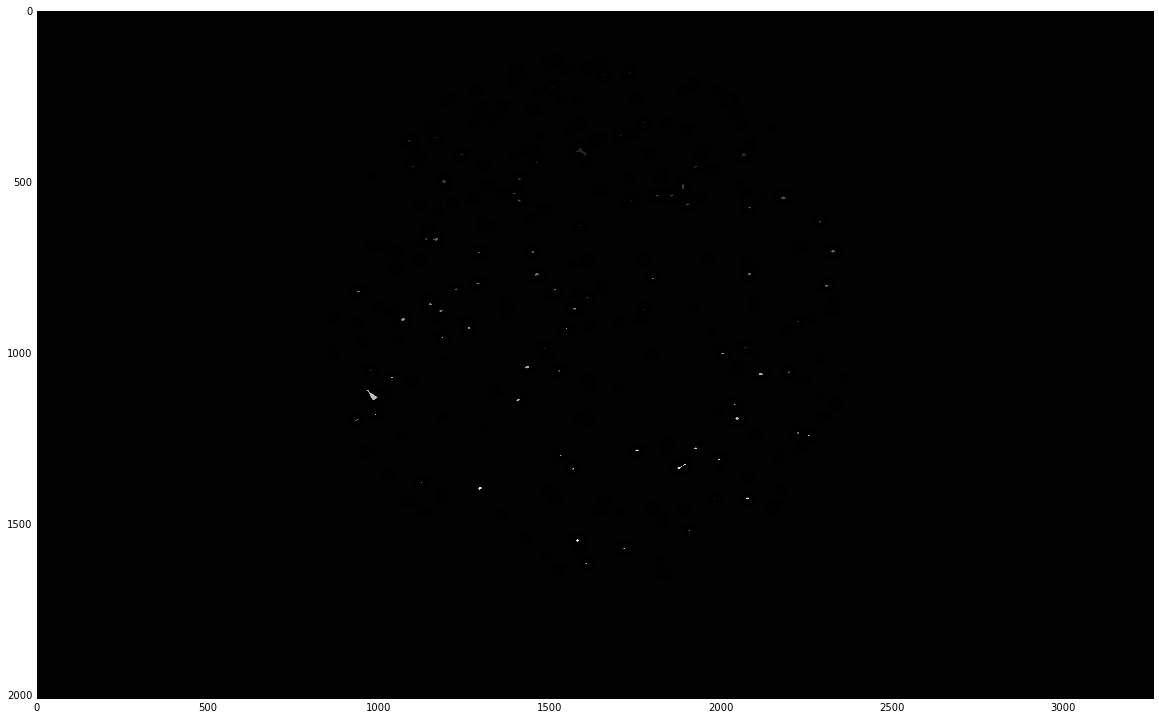

In [10]:
#dgray = cv2.cvtColor(dist_transform, cv2.COLOR_BGR2GRAY)
#_, sure_fg = cv2.threshold(dt, 150, 255, cv2.THRESH_BINARY)
#sure_fg = cv2.erode(thresh,None,iterations = 11)
ret, sure_fg = cv2.threshold(dt,0.70*dt.max(),255,0)

#sure_fg = cv2.adaptiveThreshold(dt,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,11,2)
#ret, sure_fg = cv2.threshold(dt,0.7*dist_transform.max(),255,0)
#ret, sure_fg = cv2.threshold(np.uint8(dist_transform), 0, 255,cv2.THRESH_OTSU)
#plt.imshow(sure_fg, cmap='gray')
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
#markers.setfield(0)
plt.imshow(markers, cmap='gray')

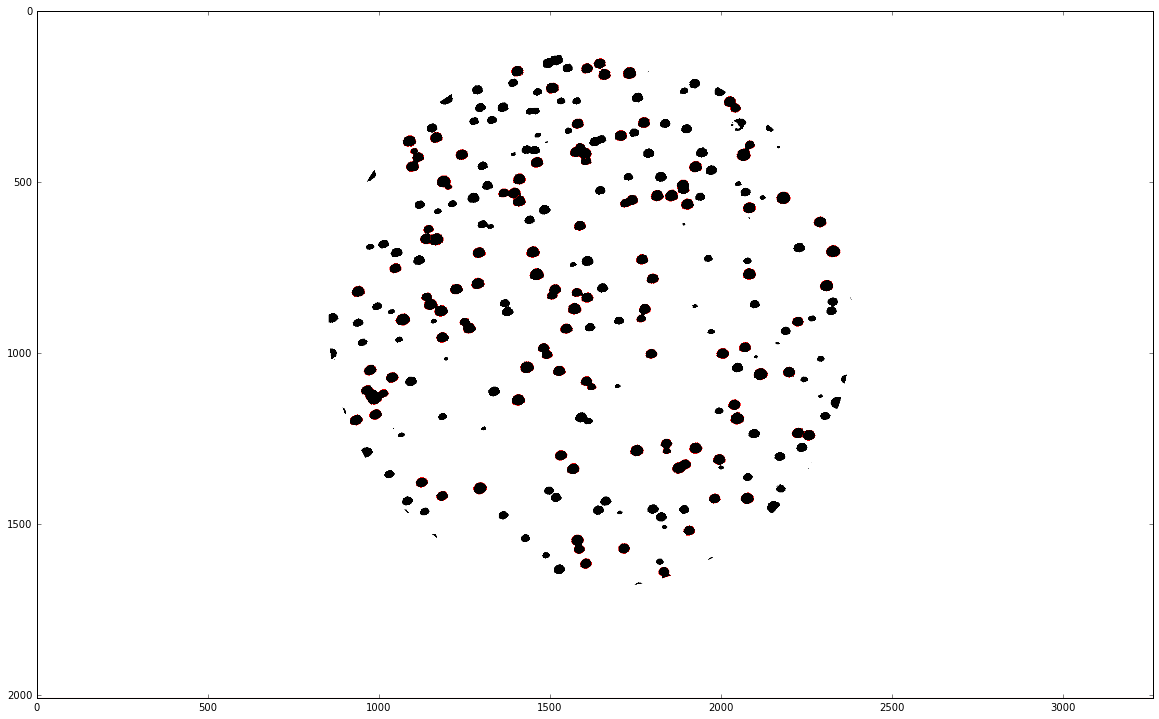

In [7]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(img)

In [8]:
dt.mean()

1.652912400642528

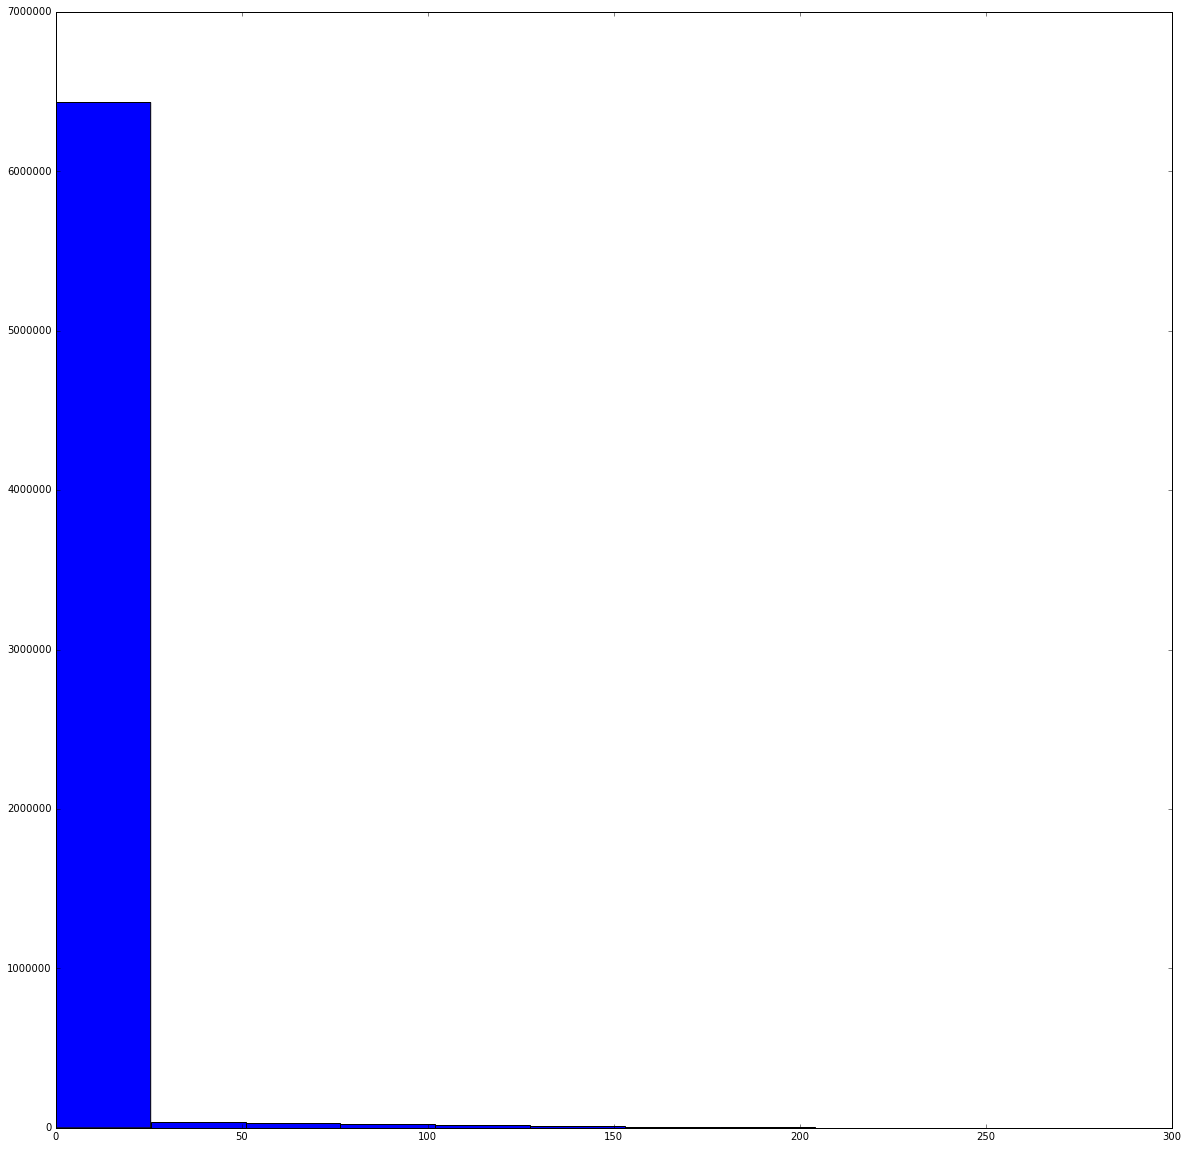

In [9]:
plt.hist(dt.ravel())
plt.show()